In [ ]:
import pandas as pd
import io
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
# Read csv file 
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['data_banknote_authentication.txt']))
df.describe()



Saving data_banknote_authentication.txt to data_banknote_authentication (4).txt


,3.6216,8.6661,-2.8073,-0.44699,0
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:

df.columns =["a","b","c","d","class"]


In [ ]:
df

,a,b,c,d,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df['class'].unique()

array([0, 1])

In [ ]:
df.isnull().sum()

a        0
b        0
c        0
d        0
class    0
dtype: int64

In [ ]:
df.groupby("class").count()

,a,b,c,d
class,,,,
0,761,761,761,761
1,610,610,610,610


In [ ]:
X=df.iloc[:,:9]
y=df.loc[:, 'class'] 

In [ ]:
X

,a,b,c,d,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64

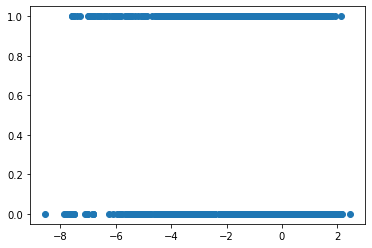

In [ ]:
#Plot a scatterplot of the dataset and conduct EDA. Report results in textbox below
import matplotlib.pyplot as plt
plt.scatter(df['d'],df['class'])


In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

MODEL BUILDING

In [ ]:
#logistic regression
# Scaling the input features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #preserve shape of the original distribution
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() #changing non numerical to numerical
y = label_encoder.fit_transform(y)

In [ ]:
# Model Building and training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the output
y_pred = clf.predict(X_test)

In [ ]:
# Computing the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.91%


Text(0.5, 1.0, 'Confusion Matrix')

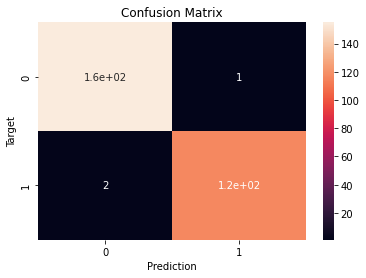

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')


In [ ]:
#decision tree
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")
tr.fit(X_train, y_train)
y_pred2 = tr.predict(X_test)
y_pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model test accuracy score with criterion gini index: 0.9801


In [ ]:
y_pred_train = model.predict(X_train)

[Text(0.6527777777777778, 0.9375, 'X[0] <= 0.272\nentropy = 0.993\nsamples = 918\nvalue = [504, 414]'),
 Text(0.4388888888888889, 0.8125, 'X[1] <= 7.565\nentropy = 0.683\nsamples = 441\nvalue = [80, 361]'),
 Text(0.2777777777777778, 0.6875, 'X[0] <= -1.741\nentropy = 0.357\nsamples = 370\nvalue = [25, 345]'),
 Text(0.08888888888888889, 0.5625, 'X[1] <= 1.772\nentropy = 0.046\nsamples = 198\nvalue = [1, 197]'),
 Text(0.044444444444444446, 0.4375, 'entropy = 0.0\nsamples = 144\nvalue = [0, 144]'),
 Text(0.13333333333333333, 0.4375, 'X[1] <= 1.775\nentropy = 0.133\nsamples = 54\nvalue = [1, 53]'),
 Text(0.08888888888888889, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17777777777777778, 0.3125, 'entropy = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(0.4666666666666667, 0.5625, 'X[2] <= 6.824\nentropy = 0.583\nsamples = 172\nvalue = [24, 148]'),
 Text(0.35555555555555557, 0.4375, 'X[1] <= 3.925\nentropy = 0.305\nsamples = 147\nvalue = [8, 139]'),
 Text(0.26666666666666666,

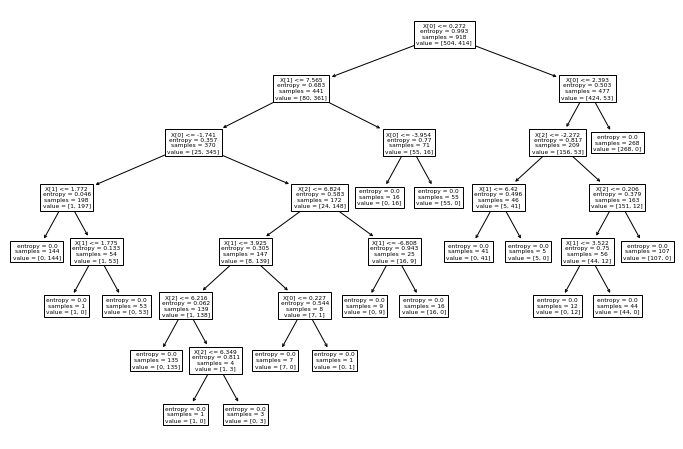

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(X_train, y_train)) 

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_SVM = svc.predict(X_test)
y_pred_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of svc:",accuracy_score(y_test,y_pred_SVM))

Accuracy of svc: 0.9955849889624724


In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 4)
results_svm = model_selection.cross_val_score(svc, X_train, y_train, cv = kfold)
print("SVM :",results_svm.mean())

SVM : 0.994560470856275


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)
y_pred_KNN

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
print("KNN:",accuracy_score(y_test,y_pred_KNN))

KNN: 1.0


In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_KNN3 = knn_3.predict(X_test)
y_pred_KNN3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_KNN5 = knn_5.predict(X_test)
y_pred_KNN5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, y_train)
y_pred_KNN4 = knn_4.predict(X_test)
y_pred_KNN4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
print("KNN with 3 neighbours :",accuracy_score(y_test,y_pred_KNN3))
print("KNN with 4 neighbours :",accuracy_score(y_test,y_pred_KNN4))
print("KNN with 5 neighbours :",accuracy_score(y_test,y_pred_KNN5))

KNN with 3 neighbours : 0.9977924944812362
KNN with 4 neighbours : 1.0
KNN with 5 neighbours : 1.0


In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 4)
results_3 = model_selection.cross_val_score(knn_3, X_train, y_train, cv = kfold)
print("KNN with 3 neighbours :",results_3.mean())

KNN with 3 neighbours : 1.0


In [ ]:
results_4 = model_selection.cross_val_score(knn_4, X_train, y_train, cv = kfold)
print("KNN with 4 neighbours :",results_4.mean())

KNN with 4 neighbours : 1.0


In [ ]:
results_5 = model_selection.cross_val_score(knn_5, X_train, y_train, cv = kfold)
print("KNN with 5 neighbours :",results_5.mean())

KNN with 5 neighbours : 1.0


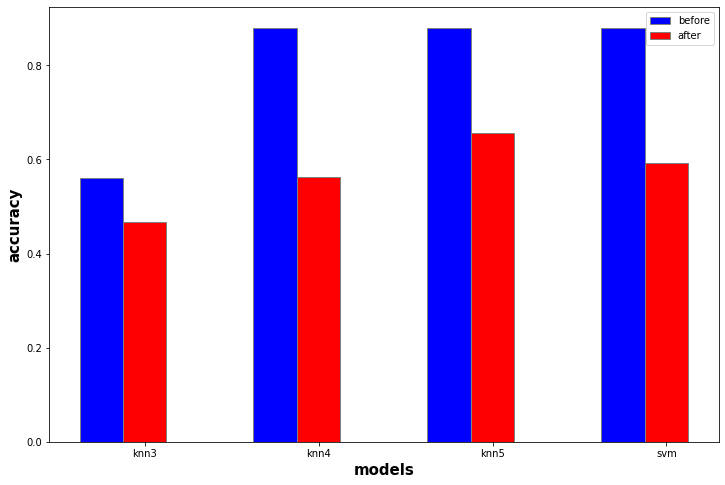

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
before = [0.56, 0.88, 0.88, 0.88]
after = [0.468, 0.562, 0.656, 0.593]

br1 = np.arange(len(before))
br2 = [x + barWidth for x in br1]



# Make the plot
plt.bar(br1,before, color ='b', width = barWidth,
		edgecolor ='grey', label ='before')
plt.bar(br2,after, color ='r', width = barWidth,
		edgecolor ='grey', label ='after')


# Adding Xticks
plt.xlabel('models', fontweight ='bold', fontsize = 15)
plt.ylabel('accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(before))],
		['knn3', 'knn4', 'knn5', 'svm'])

plt.legend()
plt.show()


OBSERVATIONS

In [ ]:


from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Rgression")
print(classification_report(y_test, y_pred))
print("Knn")
print(classification_report(y_test, y_pred_KNN))
print("SVM")
print(classification_report(y_test, y_pred_SVM))

Logistic Rgression
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       257
           1       0.98      0.97      0.98       196

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453

Knn
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       196

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

SVM
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       257
           1       0.99      1.00      0.99       196

    accuracy                           1.00       453
   macro avg       0.99      1.00      1.00       453
weighted avg       1.00      1.00      1.00    